In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd

---

## There will be three (or four) kwargs:

- `hline=` ... specify one or a list of prices to generate a ***horizontal line*** at that price level
- `vline=` ... specify one or a list of dates/datetimes to generate a ***vertical line*** at that point in time
- `aline=` ... specify one or more ***arbitrary line*** as
  - list of two or more ***x,y values*** (multiple lines are contiguous)
    - examples:
 `[(dateA,priceA),(dateB,priceB)]`
 `[(dateA,priceA),(dateB,priceB),(dateC,priceC),(dateD,priceD),...]`
  - list of one or more ***x,y value pairs*** (multiple lines need not be contiguous)
where a ***single x,y pair*** is like `((dateA,priceA),(dateB,priceB))`
    - examples: 
`aline=((dateA,priceA),(dateB,priceB))`
`aline=[((dateA,priceA),(dateB,priceB)),((dateC,priceC),(dateD,priceD)),...]`

- `tline=` ... ***trend line*** (still deciding whether to implement this).
  - specify two (or more) dates or datetimes:  mplfinance will ***automatically draw trend lines between the dates***.  An additional kwarg `tline_value` or something like that may specify which algorithm to use for calculating the trend line between any two dates.

---

---

## Test Plan

- Test each kwarg (`hline`, `vline`, `aline`, `tline`) on
  - one month daily data
  - a year or more of daily data
  - a day or more of intraday data
  
- For each kwarg test:
  - one line
  - two or more lines

- For all of the above test EVERY plot type (`ohlc`,`candle`,`line`,`renko`,`pnf`)

- For `aline` test BOTH ways of specifying lines

- For `vline` and `tline` test multiple ways of specifying dates

- Test all of the above both WITH and WITHOUT `make_addplot()` data

- For `tline` test with various `tline_value` settings.
  
---



In [3]:
daily = pd.read_csv('../data/SP500_NOV2019_Hist.csv',index_col=0,parse_dates=True)
daily.index.name = 'Date'
daily.shape
daily.head(2)
daily.tail(2)

(20, 5)

,Open,High,Low,Close,Volume
Date,,,,,
2019-11-01,3050.72,3066.95,3050.72,3066.91,510301237
2019-11-04,3078.96,3085.20,3074.87,3078.27,524848878


,Open,High,Low,Close,Volume
Date,,,,,
2019-11-27,3145.49,3154.26,3143.41,3153.63,421853938
2019-11-29,3147.18,3150.30,3139.34,3140.98,286602291


In [4]:
import mplfinance as mpf
mpf.__version__

'0.12.4a0'

---
## tline TESTS:

In [5]:
daily.loc['2019-11-01',['Open','Close']]

Open     3050.72
Close    3066.91
Name: 2019-11-01 00:00:00, dtype: float64

In [6]:
daily.loc['2019-11-02':,:].iloc[0,:]#['Open','Close']

Open      3.078960e+03
High      3.085200e+03
Low       3.074870e+03
Close     3.078270e+03
Volume    5.248489e+08
Name: 2019-11-04 00:00:00, dtype: float64

In [7]:
s = daily.loc[:'2019-11-30',:].tail(1)
s
len(s)

,Open,High,Low,Close,Volume
Date,,,,,
2019-11-29,3147.18,3150.3,3139.34,3140.98,286602291


1

In [8]:
s = daily.loc['2019-11-09':,:].head(1)[['Open','Close']]
len(s)
s.mean(axis=1).values[0]

1

3083.67

In [9]:
s = daily.loc[:'2019-11-09',:].tail(1)[['Open','Close']]
s
len(s)
s.mean(axis=1).values[0]

,Open,Close
Date,,
2019-11-08,3081.25,3093.08


1

3087.165

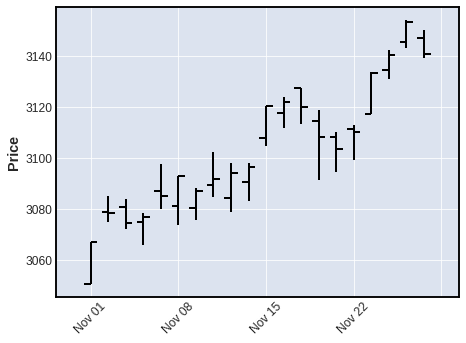

In [10]:
mpf.plot(daily)

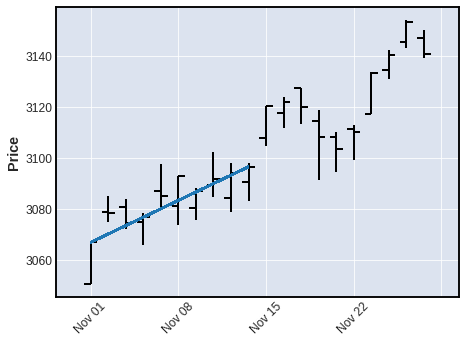

In [11]:
mpf.plot(daily,tlines=[('2019-11-01','2019-11-14')])

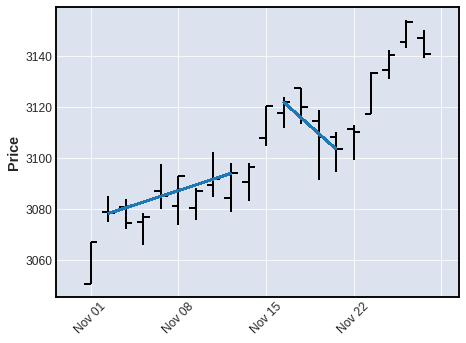

In [12]:
mpf.plot(daily,tlines=[('2019-11-02','2019-11-13'),('2019-11-17','2019-11-21')])

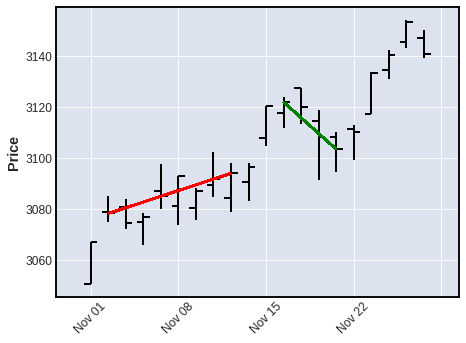

In [13]:
tl = dict(tlines=[('2019-11-02','2019-11-13'),('2019-11-17','2019-11-21')],
          colors=['r','g','b'])
mpf.plot(daily,tlines=tl)

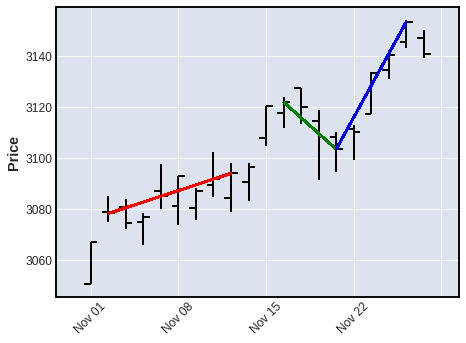

In [14]:
tl = dict(tlines=[('2019-11-02','2019-11-13'),('2019-11-17','2019-11-21'),('2019-11-21','2019-11-28')],
          colors=['r','g','b'])
mpf.plot(daily,tlines=tl)

In [15]:
import numpy as np
import matplotlib.dates as mdates

In [16]:
s = daily.loc['2019-11-02':'2019-11-13'][['Open','Close']].mean(axis=1)
x = mdates.date2num(s.index.to_pydatetime())
y = s.values
x
y

array([737367., 737368., 737369., 737370., 737371., 737374., 737375.,
       737376.])

array([3078.615, 3077.71 , 3075.94 , 3086.1  , 3087.165, 3083.67 ,
       3090.56 , 3089.11 ])

In [17]:
a = np.vstack([x, np.ones(len(x))]).T
a

array([[7.37367e+05, 1.00000e+00],
       [7.37368e+05, 1.00000e+00],
       [7.37369e+05, 1.00000e+00],
       [7.37370e+05, 1.00000e+00],
       [7.37371e+05, 1.00000e+00],
       [7.37374e+05, 1.00000e+00],
       [7.37375e+05, 1.00000e+00],
       [7.37376e+05, 1.00000e+00]])

In [18]:
slope, intercept = np.dot(np.linalg.inv(np.dot(a.T,a)), np.dot(a.T,y))
slope, intercept

(1.3334947228431702, -980197.03125)

In [19]:
x1, x2 = x[0], x[-1]
y1 = slope*x1 + intercept
y2 = slope*x2 + intercept
x1 = mdates.num2date(x1)
x2 = mdates.num2date(x2)
x1, y1
x2, y2

(datetime.datetime(2019, 11, 4, 0, 0, tzinfo=datetime.timezone.utc),
 3077.972048699856)

(datetime.datetime(2019, 11, 13, 0, 0, tzinfo=datetime.timezone.utc),
 3089.9735012054443)

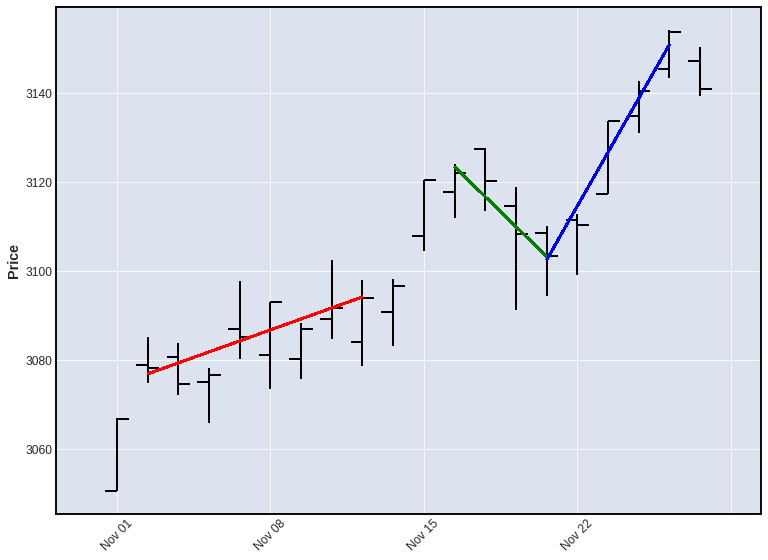

In [20]:
#mpf.plot(daily,tlines=tl,figscale=1.5)
mpf.plot(daily,tlines=tl,tline_use=['close'],tline_method='least squares',figscale=1.75)

In [21]:
tl
tl['tlines'] = [('2019-11-02','2019-11-28')]

{'tlines': [('2019-11-02', '2019-11-13'),
  ('2019-11-17', '2019-11-21'),
  ('2019-11-21', '2019-11-28')],
 'colors': ['r', 'g', 'b']}

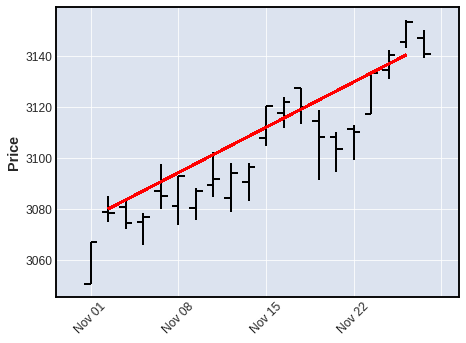

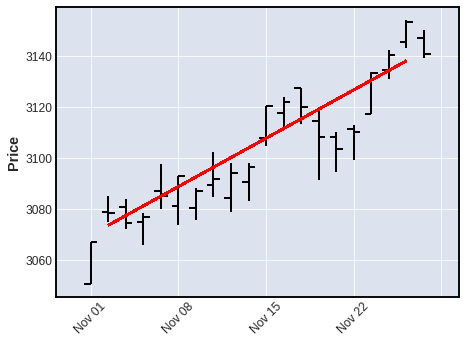

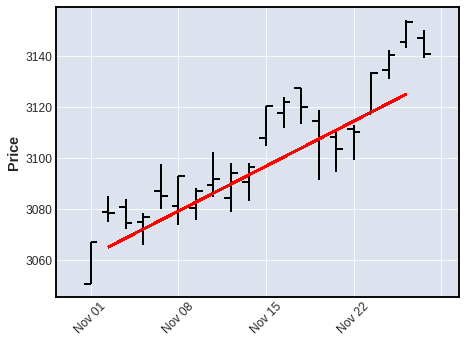

In [22]:
mpf.plot(daily,tlines=tl,tline_use=['high'],tline_method='least squares')#,figscale=1.75)
mpf.plot(daily,tlines=tl,tline_use=['close'],tline_method='least squares')#,figscale=1.75)
mpf.plot(daily,tlines=tl,tline_use=['low'],tline_method='least squares')#,figscale=1.75)

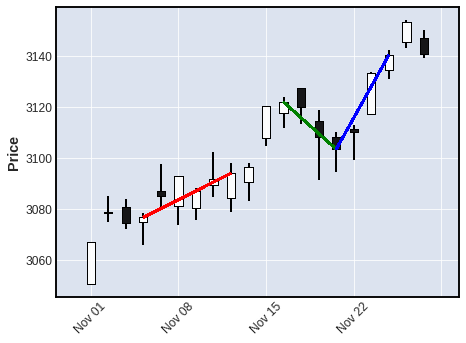

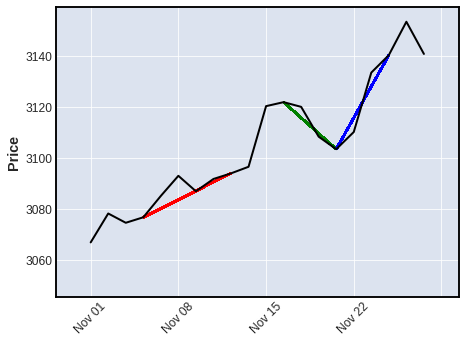

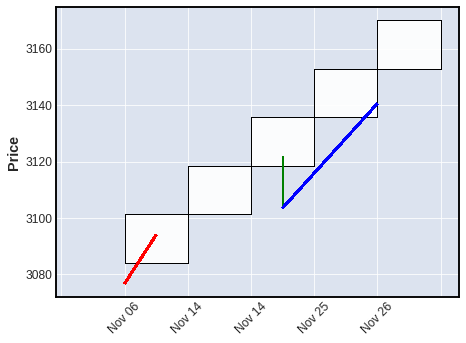

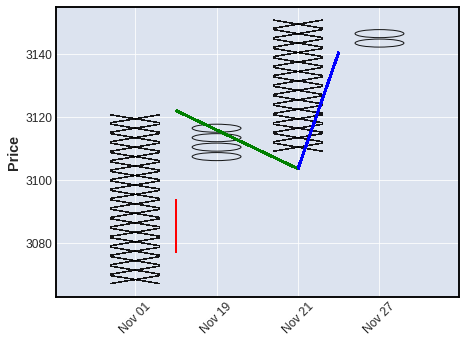

In [23]:
tl = dict(tlines=[('2019-11-06','2019-11-13'),
                  ('2019-11-17','2019-11-21'),
                  ('2019-11-21','2019-11-26')],
          colors=['r','g','b'])
mpf.plot(daily,type='candle',tlines=tl)
mpf.plot(daily,type='line',tlines=tl)
mpf.plot(daily,type='renko',tlines=tl)
mpf.plot(daily,type='pnf',tlines=tl,pnf_params=dict(box_size=3))

---

## Now a year or two of daily data:

In [24]:
df = pd.read_csv('../data/yahoofinance-SPY-20080101-20180101.csv',index_col=0,parse_dates=True)
df = df.loc['2015-01-01':'2017-01-01',:]
df.shape
df.head(2)
df.tail(2)

(504, 6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,206.380005,206.880005,204.179993,205.429993,193.286972,121465900
2015-01-05,204.169998,204.369995,201.350006,201.720001,189.796265,169632600


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-29,224.479996,224.889999,223.839996,224.350006,220.071533,47719500
2016-12-30,224.729996,224.830002,222.729996,223.529999,219.267166,108998300


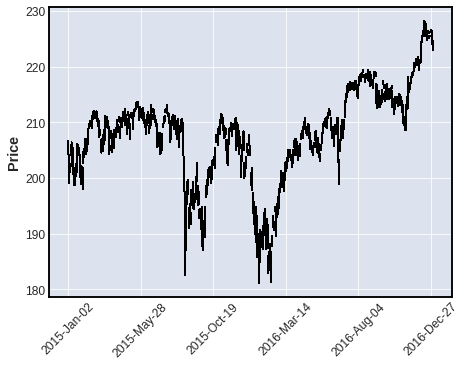

In [25]:
mpf.plot(df)

In [26]:
tl = dict(tlines=[('2015-09-06','2015-12-13'),
                  ('2015-11-17','2016-07-21'),
                  ('2016-08-21','2016-11-26')],
          colors=['r','g','b'])

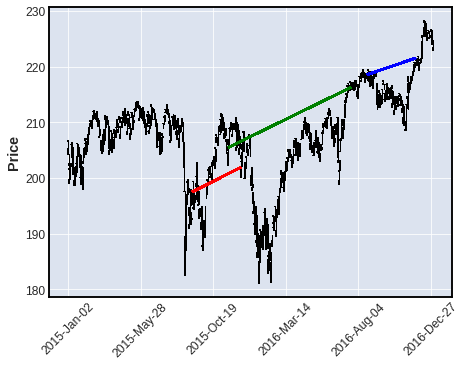

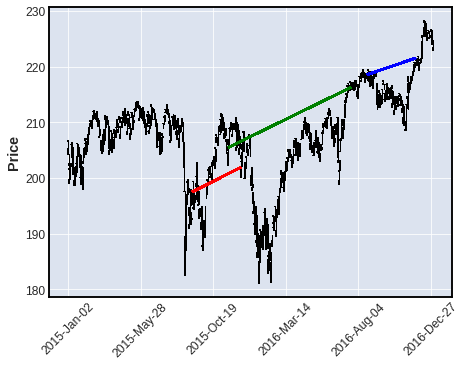

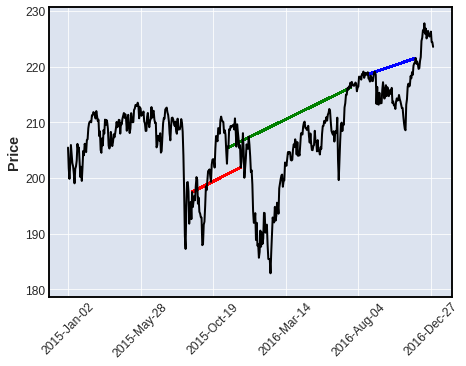

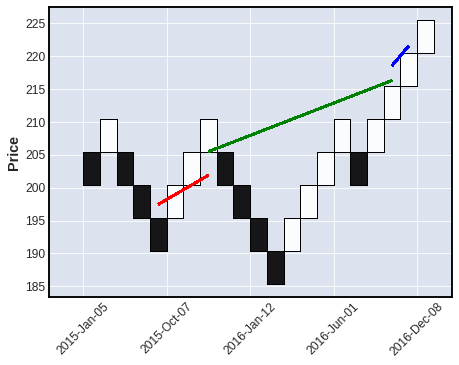

{'renko_bricks': [200.429993,
  205.429993,
  200.429993,
  195.429993,
  190.429993,
  195.429993,
  200.429993,
  205.429993,
  200.429993,
  195.429993,
  190.429993,
  185.429993,
  190.429993,
  195.429993,
  200.429993,
  205.429993,
  200.429993,
  205.429993,
  210.429993,
  215.429993,
  220.429993],
 'renko_dates': [datetime.datetime(2015, 1, 5, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2015, 2, 19, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2015, 8, 20, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2015, 8, 21, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2015, 8, 21, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2015, 10, 7, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2015, 10, 22, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2015, 11, 2, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2015, 12, 17, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2016, 1, 6, 0, 0, tzinf

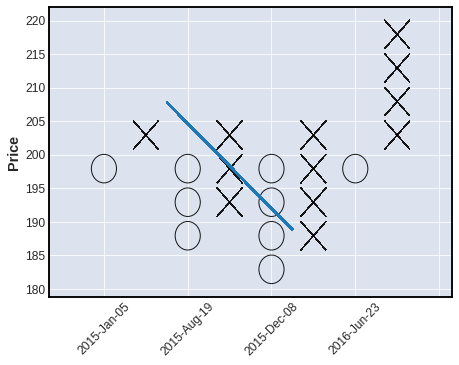

{'pnf_bricks': [200.429993,
  200.429993,
  195.429993,
  195.429993,
  192.929993,
  192.929993,
  200.429993,
  207.929993],
 'pnf_dates': [datetime.datetime(2015, 1, 5, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2015, 2, 4, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2015, 8, 19, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2015, 10, 2, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2015, 12, 8, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2016, 2, 16, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2016, 6, 23, 0, 0, tzinfo=datetime.timezone.utc),
  datetime.datetime(2016, 6, 28, 0, 0, tzinfo=datetime.timezone.utc)],
 'pnf_size': 5,
 'minx': -0.875,
 'maxx': 7.875,
 'miny': 192.929993,
 'maxy': 212.929993}

In [27]:
mpf.plot(df,type='candle',tlines=tl)

mpf.plot(df,type='candle',tlines=tl)

mpf.plot(df,type='line',tlines=tl)

cv={}
mpf.plot(df,type='renko',tlines=tl,renko_params=dict(brick_size=5),return_calculated_values=cv)
cv

cv = {}
mpf.plot(df,type='pnf',tlines=[('2015-04-06','2016-1-13')],pnf_params=dict(box_size=5),return_calculated_values=cv)
cv

---

## Now Intraday Data

In [28]:
idf = pd.read_csv('../data/SP500_NOV2019_IDay.csv',index_col=0,parse_dates=True)
idf.shape
idf.head(2)
idf.tail(2)

(1563, 5)

,Open,Close,High,Low,Volume
Date,,,,,
2019-11-05 09:30:00,3080.80,3080.49,3081.47,3080.30,0
2019-11-05 09:31:00,3080.33,3079.36,3080.33,3079.15,0


,Open,Close,High,Low,Volume
Date,,,,,
2019-11-08 15:58:00,3090.73,3091.04,3091.13,3090.58,0
2019-11-08 15:59:00,3091.16,3092.91,3092.91,3090.96,0


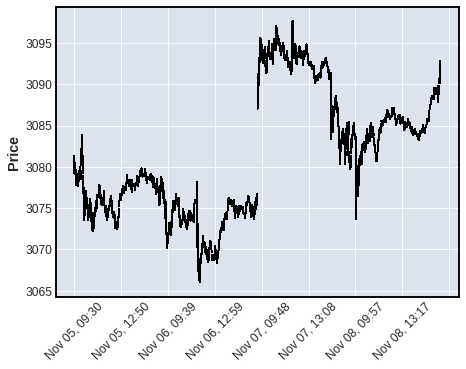

In [29]:
mpf.plot(idf)

In [30]:
tl = dict(tlines=[('2019-11-05 10:30','2019-11-05 13:00'),
                  ('2019-11-07 10:00','2019-11-07 15:00'),
                  ('2019-11-08 09:35','2019-11-08 16:00')],
          colors=['r','g','b'])

In [31]:
len(idf)

1563

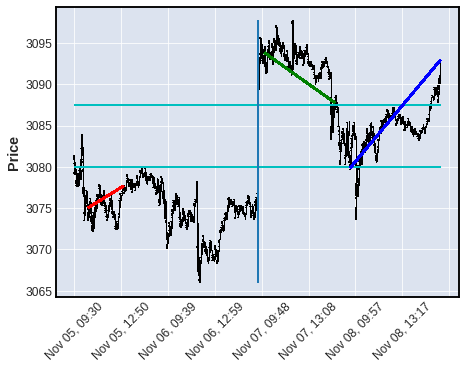

In [32]:
mpf.plot(idf,type='candle',tlines=tl,vlines='2019-11-07 9:30',hlines=dict(hlines=(3080,3087.5),colors='c'))

{'tlines': [('2019-11-05 10:30', '2019-11-05 13:00'),
  ('2019-11-07 10:00', '2019-11-07 15:00'),
  ('2019-11-08 09:35', '2019-11-08 16:00')],
 'colors': ['r', 'g', 'b']}

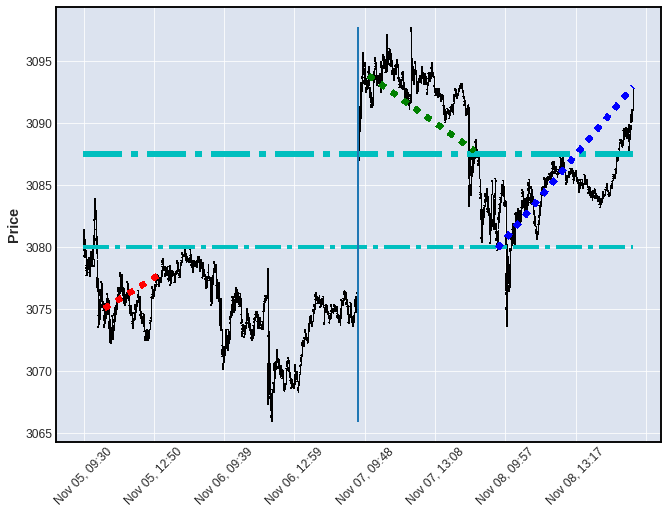

In [33]:
tl
tl['linestyle']  = 'dotted'
tl['linewidths'] = 5

kwargs = dict(tlines=tl,
              vlines='2019-11-07 9:30',
              hlines=dict(hlines=(3080,3087.5),colors='c',linestyle='-.',linewidths=[4,6,8])
             )
mpf.plot(idf,type='candle',**kwargs, figscale=1.5)

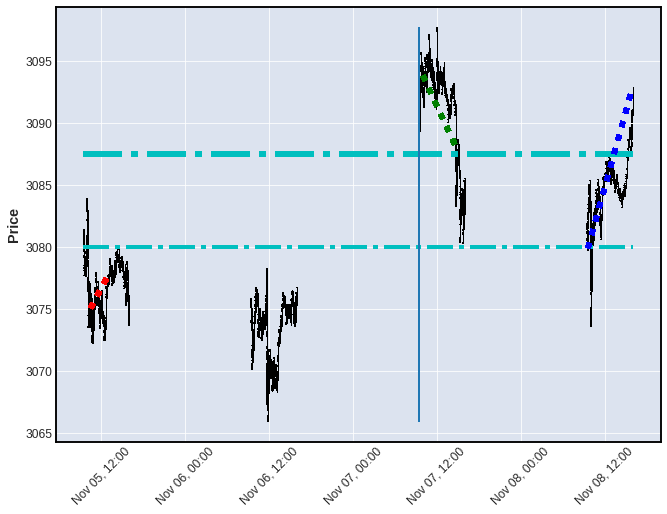

In [34]:
mpf.plot(idf,type='candle',**kwargs, figscale=1.5, show_nontrading=True)